**Inicialization**

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

**Upload info and concatenate data sets texto en negrita**

In [6]:
d_2018 = pd.read_csv("Datos_Abiertos_ARESEP_Pasajeros_movilizados_2018.csv")
d_2019 = pd.read_csv("Datos_Abiertos_ARESEP_Pasajeros_movilizados_2019.csv")
d_2020 = pd.read_csv("Datos_Abiertos_ARESEP_Pasajeros_movilizados_2020.csv")
d_2021 = pd.read_csv("Datos_Abiertos_ARESEP_Pasajeros_movilizados_2021.csv")
dat = pd.concat([d_2018, d_2019, d_2020, d_2021])

In [7]:
#check the data
dat.head()

,Nombre Operador,Cédula,Código Ruta,Descripción Ruta,Código Ramal,Descripción Ramal,Mes,Año,pasajeroEquivalente,pasajerosTotal,Pasajeros Adulto Mayor,Pasajeros Regulares,Carreras,Ingresos
0,A.T.Z. ALFARO RUIZ S.A.,3-101-554030,214,SAN JOSE-ZARCERO-LAGUNA DE ALFARO RUIZ,R0581,SAN JOSE-LAGUNA DE ALFARO RUIZ,10,2018,NaN,NaN,NaN,19248.0,229.0,22871000.0
1,A.T.Z. ALFARO RUIZ S.A.,3-101-554030,214,SAN JOSE-ZARCERO-LAGUNA DE ALFARO RUIZ,R0581,SAN JOSE-LAGUNA DE ALFARO RUIZ,11,2018,NaN,NaN,NaN,19564.0,222.0,23244000.0
2,A.T.Z. ALFARO RUIZ S.A.,3-101-554030,214,SAN JOSE-ZARCERO-LAGUNA DE ALFARO RUIZ,R0581,SAN JOSE-LAGUNA DE ALFARO RUIZ,12,2018,NaN,NaN,NaN,18505.0,212.0,21989000.0
3,"ALGONZA, S.A.",3-101-096643,542,NICOYA-NANDAYURE,R1417,NICOYA-NANDAYURE,10,2018,NaN,NaN,381.0,5725.0,105.0,5785800.0
4,"ALGONZA, S.A.",3-101-096643,542,NICOYA-NANDAYURE,R1417,NICOYA-NANDAYURE,11,2018,NaN,NaN,355.0,6432.0,104.0,6049500.0


**ETL**

In [8]:
#check the data
dat.shape

(40330, 14)

In [9]:
dat.describe()

,Mes,Año,pasajeroEquivalente,pasajerosTotal,Pasajeros Adulto Mayor,Pasajeros Regulares,Carreras,Ingresos
count,40330.000000,40330.000000,0.0,0.0,38803.000000,39600.000000,39601.000000,3.959900e+04
mean,6.516018,2019.710588,NaN,NaN,2387.509729,28772.857702,626.396623,1.355717e+07
std,3.469066,0.916050,NaN,NaN,4893.011466,52982.253374,2232.673057,2.518134e+07
min,1.000000,2018.000000,NaN,NaN,1.000000,1.000000,0.500000,3.650000e+02
25%,3.000000,2019.000000,NaN,NaN,202.000000,2847.000000,77.500000,1.778158e+06
50%,7.000000,2020.000000,NaN,NaN,699.000000,8824.000000,248.000000,4.686045e+06
75%,10.000000,2020.000000,NaN,NaN,2490.000000,29712.250000,725.000000,1.440570e+07
max,12.000000,2021.000000,NaN,NaN,394800.000000,680855.000000,337712.500000,3.588369e+08


In [10]:
dat.columns

Index(['Nombre Operador', 'Cédula', 'Código Ruta', 'Descripción Ruta',
       'Código Ramal', 'Descripción Ramal', 'Mes', 'Año',
       'pasajeroEquivalente', 'pasajerosTotal', 'Pasajeros Adulto Mayor',
       'Pasajeros Regulares', 'Carreras', 'Ingresos'],
      dtype='object')

In [11]:
#check the categorical data
(dat.dtypes != "category").values & (dat.dtypes != "object").values 

array([False, False, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True])

In [12]:
dat.Año.value_counts()

2019    13994
2020    13562
2021     9290
2018     3484
Name: Año, dtype: int64

In [13]:
#sum the missing data
dat.isna().sum()

Nombre Operador               0
Cédula                        0
Código Ruta                   0
Descripción Ruta              0
Código Ramal                  4
Descripción Ramal           987
Mes                           0
Año                           0
pasajeroEquivalente       40330
pasajerosTotal            40330
Pasajeros Adulto Mayor     1527
Pasajeros Regulares         730
Carreras                    729
Ingresos                    731
dtype: int64

In [14]:
#check the missing data drop it
dat = dat.drop(["Descripción Ramal","pasajeroEquivalente","pasajerosTotal","Pasajeros Adulto Mayor"], axis = 1)

In [15]:
dat.isna().sum()

Nombre Operador          0
Cédula                   0
Código Ruta              0
Descripción Ruta         0
Código Ramal             4
Mes                      0
Año                      0
Pasajeros Regulares    730
Carreras               729
Ingresos               731
dtype: int64

In [16]:
dat = dat.fillna(0)

In [17]:
dat.isna().sum()

Nombre Operador        0
Cédula                 0
Código Ruta            0
Descripción Ruta       0
Código Ramal           0
Mes                    0
Año                    0
Pasajeros Regulares    0
Carreras               0
Ingresos               0
dtype: int64

In [18]:
dat.shape

(40330, 10)

In [19]:
dat.dtypes

Nombre Operador         object
Cédula                  object
Código Ruta             object
Descripción Ruta        object
Código Ramal            object
Mes                      int64
Año                      int64
Pasajeros Regulares    float64
Carreras               float64
Ingresos               float64
dtype: object

**Cantidad de registros por cada año**

/Users/roger/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Año', ylabel='count'>

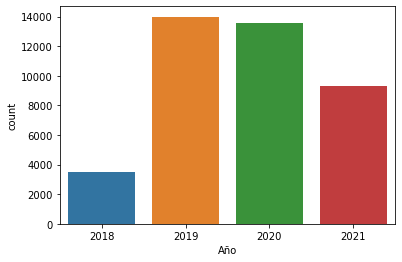

In [20]:
sns.countplot(dat["Año"])

**Sumatoria total de pasajeros, carreras e ingresos por servicios públicos (autobus) por cada año**

In [21]:
rev_year = dat.groupby(by = ["Año"]).sum() 
rev_year.reset_index(inplace=True) 
rev_year

,Año,Mes,Pasajeros Regulares,Carreras,Ingresos
0,2018,38332,133268458.0,2963809.38,6.140553e+10
1,2019,90887,513825513.0,10009865.30,2.414566e+11
2,2020,86973,284098407.0,7016804.00,1.318692e+11
3,2021,46599,208212787.0,4815454.00,1.021192e+11


***Notas para el EDA y predicción***

1- Pasajeros regulares es la cantidad total de pasajeros que pagaron su pasaje, se eliminó el datos de los adultos mayores pues no es tan relevante con respecto al análisis propio que se está haciendo, pues la masa que buscamos predecir esta concentrada en la población activa (niños que van a estudiar y adultos que van a trabajar).

2- Las carreras corresponden a la cantidad de viajes realizados por los autobuses en sus correspondientes recorridos, la información es mensual y corresponde a la sumatoria de todas las carreras realizadas por cada empresa en cada uno de los respectivos ramales (rutas) que atiende.

3- Nuestra línea base serán los ingresos obtenidos en el año 2019 y la predicción debe indicarnos cuando se retomará esa línea base tomando en cuenta que ya hay mayor apertura para salir y que el año 2022 (si no hay otra ola de Covid 19) se retomarán normalmente las actividades de educación y laborales.

4- Como se puede apreciar en el gráfico, el año 2018 no tiene una cantidad de datos consistente con el resto de los años, esto pues el proceso de recolección de información inició a mediados de ese año de manera voluntaria y a partir de diciembre del mismo año ya fue obligatorio el envío de la información denominada "Estadísticas Mensuales" a la Aresep.

**EDA**

In [22]:
# Data grouped by year and month
rev_month = dat.groupby(by = ["Año","Mes"]).sum() 
rev_month.reset_index(inplace=True) 
rev_month.head()

,Año,Mes,Pasajeros Regulares,Carreras,Ingresos
0,2018,10,44859810.0,1275849.95,2.006380e+10
1,2018,11,44605604.0,850921.25,2.033067e+10
2,2018,12,43803044.0,837038.18,2.101106e+10
3,2019,1,43089294.0,859978.35,2.060150e+10
4,2019,2,42692522.0,805859.45,1.957121e+10


In [23]:
# get date from the columns with the year and month and set it as index
rev_date = rev_month.drop(['Año','Mes'], axis=1) 
rev_date.index = pd.date_range('10-2018', '11-2021', freq='M') # get dates between 10-2018 and 11-2021
rev_date.head()

,Pasajeros Regulares,Carreras,Ingresos
2018-10-31,44859810.0,1275849.95,2.006380e+10
2018-11-30,44605604.0,850921.25,2.033067e+10
2018-12-31,43803044.0,837038.18,2.101106e+10
2019-01-31,43089294.0,859978.35,2.060150e+10
2019-02-28,42692522.0,805859.45,1.957121e+10


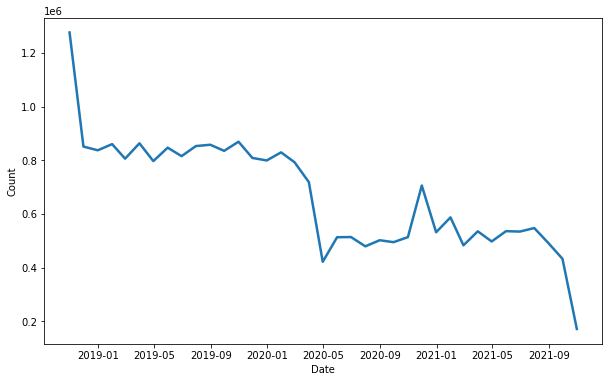

In [24]:
# Temporal series of the total bus trips per month
fig = plt.gcf()
fig.set_size_inches( 10, 6)
g = sns.lineplot(data=rev_date['Carreras'], linewidth=2.5)
g.set(xlabel='Date', ylabel='Count')
plt.show()

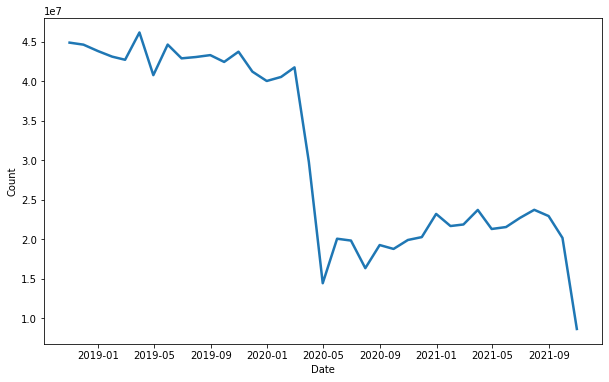

In [25]:
# Temporal series of the total passengers per month
fig = plt.gcf()
fig.set_size_inches( 10, 6)
g = sns.lineplot(data=rev_date['Pasajeros Regulares'], linewidth=2.5)
g.set(xlabel='Date', ylabel='Count')
plt.show()

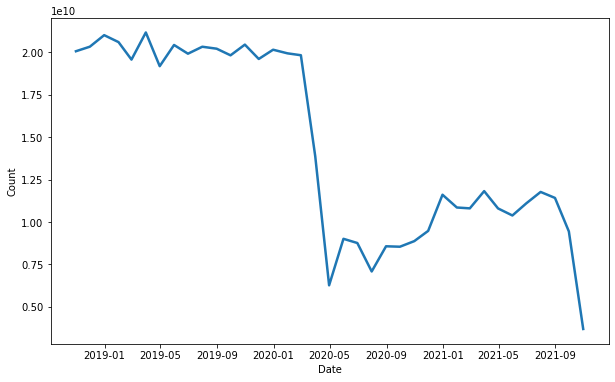

In [26]:
# Temporal series of the total income per month
fig = plt.gcf()
fig.set_size_inches( 10, 6)
g = sns.lineplot(data=rev_date['Ingresos'], linewidth=2.5)
g.set(xlabel='Date', ylabel='Count')
plt.show()

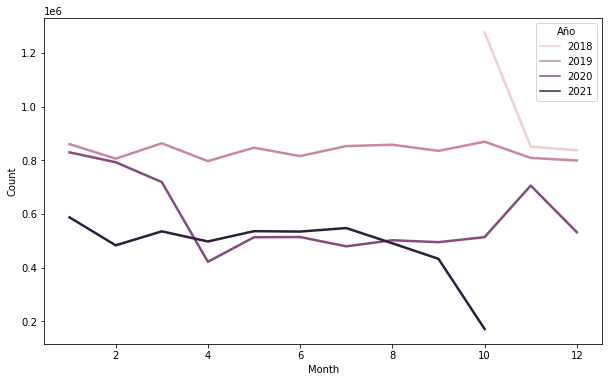

In [27]:
# Temporal series of the total bus trips per month and year
fig = plt.gcf()
fig.set_size_inches( 10, 6)
g = sns.lineplot(data=rev_month, x="Mes", y="Carreras", hue="Año", linewidth=2.5)
g.set(xlabel='Month', ylabel='Count')
plt.show()

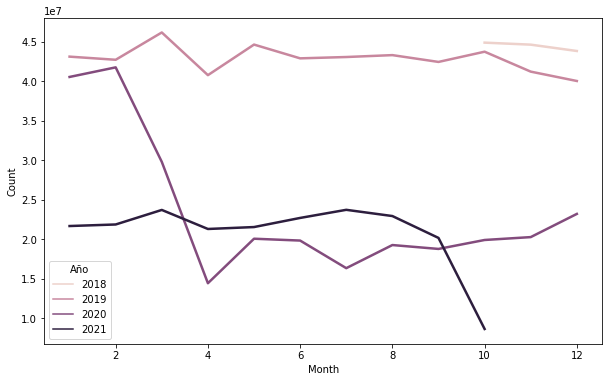

In [28]:
# Temporal series of the total passengers per month and year
fig = plt.gcf()
fig.set_size_inches( 10, 6)
g = sns.lineplot(data=rev_month, x="Mes", y="Pasajeros Regulares", hue="Año", linewidth=2.5)
g.set(xlabel='Month', ylabel='Count')
plt.show()

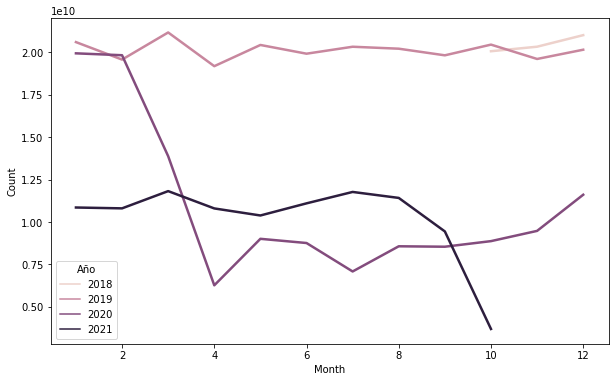

In [29]:
# Temporal series of the income trips per month and year
fig = plt.gcf()
fig.set_size_inches( 10, 6)
g = sns.lineplot(data=rev_month, x="Mes", y="Ingresos", hue="Año", linewidth=2.5)
g.set(xlabel='Month', ylabel='Count')
plt.show()

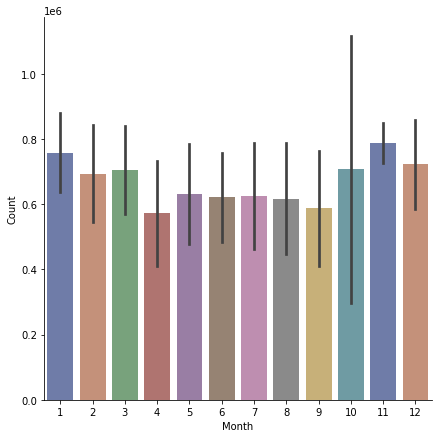

In [30]:
# Count of the total bus trips per month
g = sns.catplot(
    data=rev_month, kind="bar",
    x="Mes", y="Carreras", ci="sd", # ci=“sd” ---> draw the standard deviation of the observations
    palette="dark", alpha=.6, height=6
)
g.set_axis_labels("Month", "Count")
plt.show()

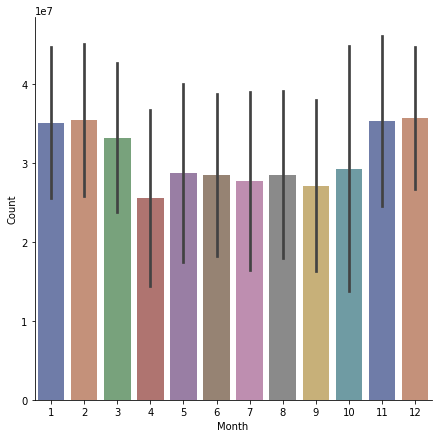

In [31]:
# Count of the total passengers per month
g = sns.catplot(
    data=rev_month, kind="bar",
    x="Mes", y="Pasajeros Regulares", ci="sd", # ci=“sd” ---> draw the standard deviation of the observations
    palette="dark", alpha=.6, height=6
)
g.set_axis_labels("Month", "Count")
plt.show()

In [32]:
rev_date.head()

,Pasajeros Regulares,Carreras,Ingresos
2018-10-31,44859810.0,1275849.95,2.006380e+10
2018-11-30,44605604.0,850921.25,2.033067e+10
2018-12-31,43803044.0,837038.18,2.101106e+10
2019-01-31,43089294.0,859978.35,2.060150e+10
2019-02-28,42692522.0,805859.45,1.957121e+10


In [33]:
correlation = rev_date.corr() # correlation matrix to understand the relationship between the variables

<AxesSubplot:>

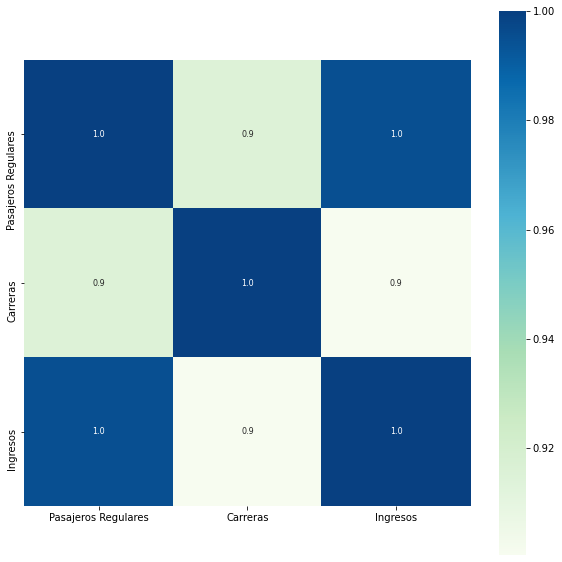

In [34]:
# constructing a heatmap to understand the correlation
# Weak Correlation --> below 0.5 
# Correlation --> 0.5 - 0.7
# Strong Correlation --> more than 0.7
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='GnBu')

In [35]:
#Import the data from the xlsx file only wtih the columns FECHA, positivos

use = ['FECHA', 'positivos']
data = pd.read_excel("CASOSCOVID.xlsx",sheet_name="1_GENERAL", usecols=use)
data.head()

,FECHA,positivos
0,2020-03-06,2
1,2020-03-07,7
2,2020-03-08,10
3,2020-03-09,12
4,2020-03-10,13


In [36]:
#sum the na values
data.isna().sum()

FECHA        0
positivos    0
dtype: int64

In [37]:
#look the data types
data.dtypes

FECHA        datetime64[ns]
positivos             int64
dtype: object

In [38]:
#change the data type to datetime
data['FECHA'] = pd.to_datetime(data['FECHA'])

In [39]:
#extract the year and month from the datetime
data['year'] = data['FECHA'].dt.year
data['month'] = data['FECHA'].dt.month
#data.drop(['dat'], axis=1, inplace=True)


EDA COVID

In [40]:
# Data grouped by year and month COVID
rev_monthc = data.groupby(by = ["year","month"]).sum() 
rev_monthc.reset_index(inplace=True) 
rev_monthc.head()

,year,month,positivos
0,2020,3,3104
1,2020,4,17866
2,2020,5,26697
3,2020,6,58319
4,2020,7,309536


In [41]:
#chance the name of the columns
rev_monthc.columns = ['Año','Mes','positivos']

In [42]:
# joint the data rev_month and rev_monthc
rev_datec = rev_month.merge(rev_monthc, on=['Año','Mes'], how='left')

In [43]:
rev_datec.head()

,Año,Mes,Pasajeros Regulares,Carreras,Ingresos,positivos
0,2018,10,44859810.0,1275849.95,2.006380e+10,NaN
1,2018,11,44605604.0,850921.25,2.033067e+10,NaN
2,2018,12,43803044.0,837038.18,2.101106e+10,NaN
3,2019,1,43089294.0,859978.35,2.060150e+10,NaN
4,2019,2,42692522.0,805859.45,1.957121e+10,NaN


In [44]:
#fill the na values with 0
rev_datec = rev_datec.fillna(0)

In [45]:
correlation = rev_datec.corr() # correlation matrix to understand the relationship between the variables


<AxesSubplot:>

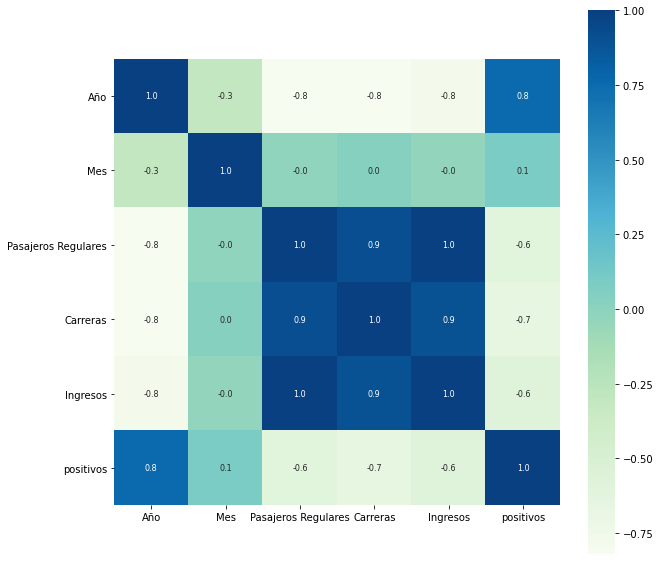

In [46]:
# constructing a heatmap to understand the correlation
# Weak Correlation --> below 0.5 
# Correlation --> 0.5 - 0.7
# Strong Correlation --> more than 0.7
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='GnBu')

In [47]:
rev_datec.head()

,Año,Mes,Pasajeros Regulares,Carreras,Ingresos,positivos
0,2018,10,44859810.0,1275849.95,2.006380e+10,0.0
1,2018,11,44605604.0,850921.25,2.033067e+10,0.0
2,2018,12,43803044.0,837038.18,2.101106e+10,0.0
3,2019,1,43089294.0,859978.35,2.060150e+10,0.0
4,2019,2,42692522.0,805859.45,1.957121e+10,0.0


In [50]:
#create the X and y variables
y = rev_datec['Ingresos']
X = rev_datec.drop(['Ingresos','Carreras','Pasajeros Regulares'], axis=1)

In [51]:
print(X.head())
print(y.head())

    Año  Mes  positivos
0  2018   10        0.0
1  2018   11        0.0
2  2018   12        0.0
3  2019    1        0.0
4  2019    2        0.0
0    2.006380e+10
1    2.033067e+10
2    2.101106e+10
3    2.060150e+10
4    1.957121e+10
Name: Ingresos, dtype: float64


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [53]:
# Spliting the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [54]:
#Create a linear regresion model and fit it to the training set. I use the XGBoost algorithm
lm = LinearRegression() # loading the model
#train the model
lm.fit(X_train, y_train)

LinearRegression()

In [55]:
#value of the coefficients
lm.intercept_

13427073901160.797

In [56]:
#Convert the coefficients to a data frame and display it
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeff_df.head()

,Coefficient
Año,-6.639796e+09
Mes,-4.747613e+08
positivos,3.829386e+02


In [57]:
#Converting the coefficient values to a dataframe
coeffcients = pd.DataFrame([X_train.columns,lm.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,Año,-6639796044.427677
1,Mes,-474761330.872944
2,positivos,382.938575


In [58]:
# Model prediction on train data
y_pred = lm.predict(X_train)

In [59]:
# Model prediction on test data
y_pred_test = lm.predict(X_test)
# show the first 5 predicted values
y_pred_test[:5]

array([1.12296355e+10, 1.18596560e+10, 1.37363688e+10, 1.75275968e+10,
       9.07321714e+09])

In [60]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.7260458221766155
Adjusted R^2: 0.6903126685474784
MAE: 2371682881.3167977
MSE: 8.311853287856544e+18
RMSE: 2883028492.376817


In [65]:
# Model Evaluation on test data
print('R^2:',metrics.r2_score(y_test, y_pred_test))

R^2: 0.6149776276071022


In [ ]:
#create a df to test the model
